# Beyond Linearity

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df_test = pd.read_csv('C:/Users/dillo/OneDrive/Desktop/PhD Data Science/00 - Classes/DDS-8555 Predictive Analysis/Assignment_3/Data/test.csv')
df_train = pd.read_csv('C:/Users/dillo/OneDrive/Desktop/PhD Data Science/00 - Classes/DDS-8555 Predictive Analysis/Assignment_3/Data/train.csv')

## Exploritory Data Analysis
Determining the overall structure of the data and searching for NA values. 

In [5]:
df_train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


Note: The test set does not have the 'Rings' feature as this is the feature the model will predict. 

In [7]:
df_test.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [8]:
df_train.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [9]:
df_test.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
dtype: int64

We do not have any NA values in either the training set or the test set. It is important to not that not all variable are numeric. To fix this we will be conducting feature engineering on the 'Sex' variable. 

First we need to determin the unique values for the 'Sex' feature. This can be easily accomplish utilizing the unique() function, but I will utilize value_counts() to return the number of each value as well.

In [11]:
df_train['Sex'].value_counts()

Sex
I    33093
M    31027
F    26495
Name: count, dtype: int64

Now I will convert each categorical value for 'Sex' into a numerical form. This is accomplished utilizing get_dummies() from the pandas library. This function creates a seperate feature for each value of the 'Sex' feature with either "True", or "False" if an observation is of a specific Sex. To get the "True", and "False" to display as 0 & 1 simply set 'dtype = int'.

As we can see below each value of 'Sex' has its own feature and the original 'Sex' feature was dropped from the dataframe. This process is know as "One-hot Encoding".

In [13]:
dummies = pd.get_dummies(df_train['Sex'], dtype = int)
df_train = pd.concat([df_train, dummies], axis = 1).drop(['Sex'], axis = 1)
df_train.head()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,F,I,M
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,1,0,0
1,1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,1,0,0
2,2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,0,1,0
3,3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,0,0,1
4,4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,0,1,0


Next the same change will be implemented on the abalone test set. 

In [15]:
dummies = pd.get_dummies(df_test['Sex'], dtype = int)
df_test = pd.concat([df_test, dummies], axis = 1).drop(['Sex'], axis = 1)
df_test.head()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,F,I,M
0,90615,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,0,0,1
1,90616,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,0,0,1
2,90617,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,0,0,1
3,90618,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,0,0,1
4,90619,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,0,1,0


In the next section I will set up the data for Polynomial Regression

## Polynomial Regression

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Below I set the variable ID_COL & OBJECT_COL as these will be pulled from the predicted data and submitted to the abalone competition via CSV. For this competition I will be predicting the age or 'Rings' of the Abalone. The dependent variable is save to OBJECT_COL and utilized to seperate the indenpent variable into X_train and the dependent variable 'Rings' into y_train.

In [20]:
ID_COL = "id"
OBJECT_COL = "Rings"

X_train = df_train.drop(OBJECT_COL, axis = 1)
X_test = df_test
y_train = df_train[OBJECT_COL]

Now we need to determine at what degree the Polynomial Model should be. To accomplish this I will create a for loop that loops through severial degrees to determin the BIC (Bayesian Information Criterion) and the R2 values. 

In [22]:
D = []
BIC = []
R2 = []

for degree in [1, 2, 3, 4, 5]:
    poly = PolynomialFeatures(degree = degree)
    X_poly = poly.fit_transform(X_train)
    model = sm.OLS(y_train, X_poly).fit()
    y_pred = model.predict(X_poly)
    D.append(degree)
    BIC.append(model.bic)
    R2.append(model.rsquared)

In [23]:
stats =  {'Degree':D, 'BIC':BIC, 'R2':R2}

table = pd.DataFrame(stats, columns = ['Degree', 'BIC', 'R2'], index = None)
table

,Degree,BIC,R2
0,1,382416.434523,0.605605
1,2,375107.685830,0.638542
2,3,395847.340512,0.545294
3,4,530525.415996,-1.012591
4,5,564336.940697,-1.927265


Text(0, 0.5, 'BIC')

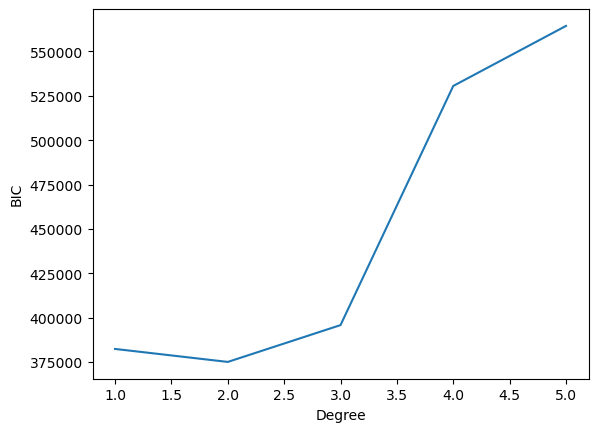

In [24]:
plt.plot('Degree', 'BIC', data = stats)
plt.xlabel('Degree')
plt.ylabel('BIC')

As we can see in the above graph, after degree 2, the BIC rises, and the R2 value falls. This indicates that degree 2 is the optimal degree for this dataset. 

## Next I will predict the 'Rings' for the test set using degree = 2

In [27]:
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
model = sm.OLS(y_train, X_poly).fit()
y_pred = model.predict(X_test_poly)

y_pred

array([ 9.26254725,  9.72400328, 10.48197046, ..., 11.58283278,
       12.82849674,  8.63844718])

Creating the CSV for submission to kaggle

In [31]:
submission_polynomial_regression = pd.DataFrame({ID_COL: X_test[ID_COL], OBJECT_COL: y_pred})
submission_polynomial_regression

,id,Rings
0,90615,9.262547
1,90616,9.724003
2,90617,10.481970
3,90618,10.128625
4,90619,7.660282
...,...,...
60406,151021,6.371128
60407,151022,9.304363
60408,151023,11.582833
60409,151024,12.828497


In [33]:
submission_polynomial_regression.to_csv("polynomial_submission.csv", index = False)